## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum - `np.argmin`.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Ostatecznie należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/'
fileName = 'jet.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

In [2]:
I = cv2.imread('jet.bmp', cv2.IMREAD_GRAYSCALE)

In [3]:
H = cv2.calcHist([I], [0], None, [256], [0, 256])

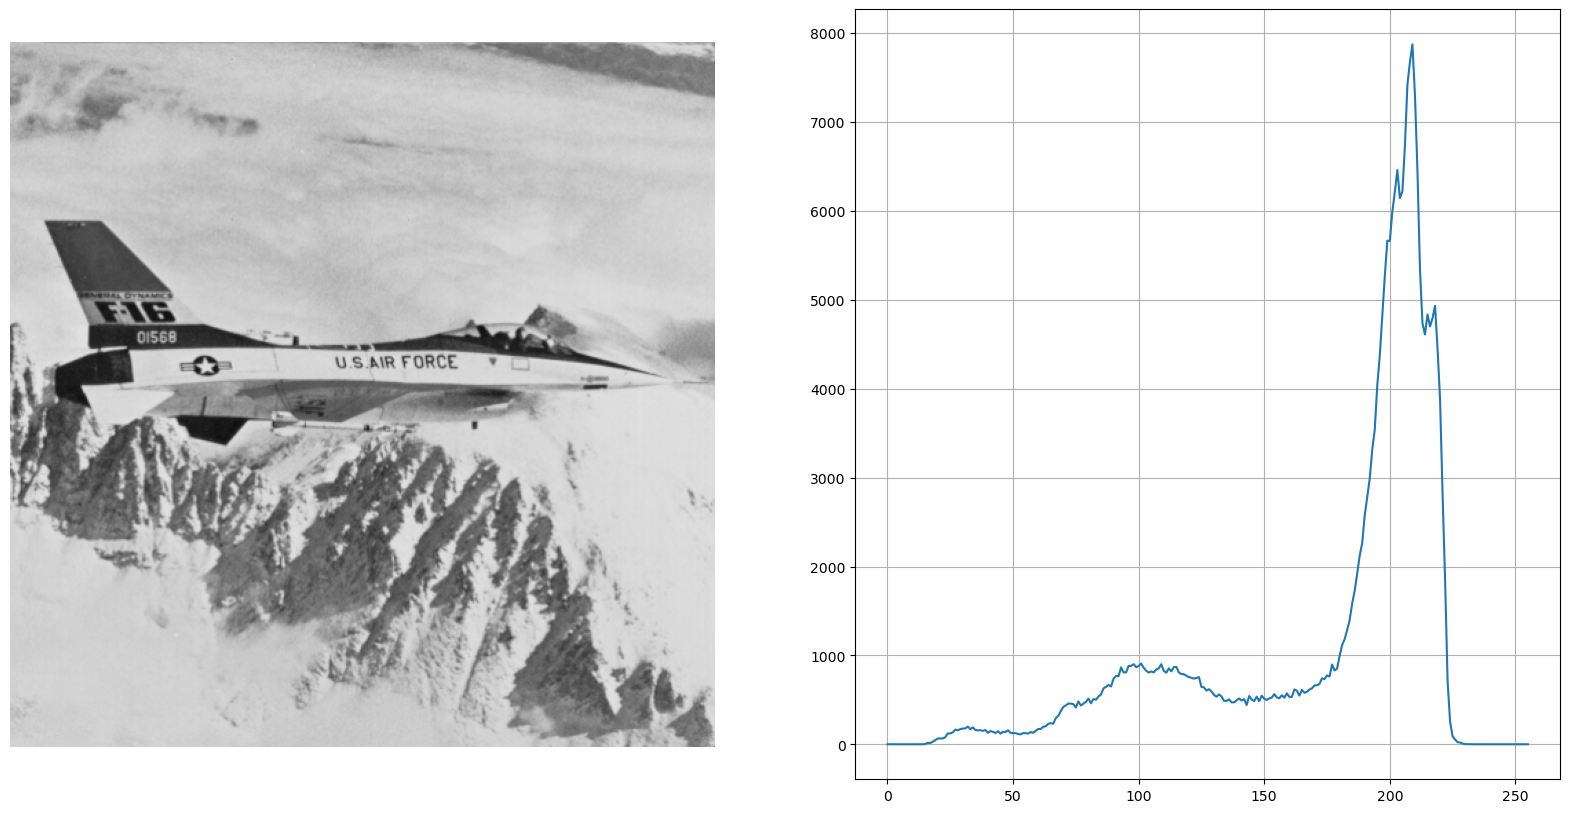

In [4]:
figHist, axsHist = plt.subplots(1, 2)
figHist.set_size_inches(20, 10)
axsHist[0].imshow(I, 'gray', vmin=0, vmax=256)
axsHist[0].axis('off')
axsHist[1].plot(H)
axsHist[1].grid()

In [5]:
lm = int(cv2.mean(I)[0])

In [6]:
H1 = H[:lm + 1]
H2 = H[lm+1:]

In [7]:
CH1 = H1.cumsum()
CH2 = H2.cumsum()

In [8]:
NCH1 = CH1 / CH1.max()
NCH2 = CH2 / CH2.max()

In [9]:
C1n = lm * NCH1
C2n = lm + 1 + (255 - lm - 1) * NCH2

In [10]:
lut = np.concatenate((C1n, C2n)).astype('uint8')

In [11]:
R = cv2.LUT(I, lut)

In [12]:
HR = cv2.calcHist([R], [0], None, [256], [0, 256])

In [13]:
E = cv2.equalizeHist(I)
HE = cv2.calcHist([E], [0], None, [256], [0, 256])

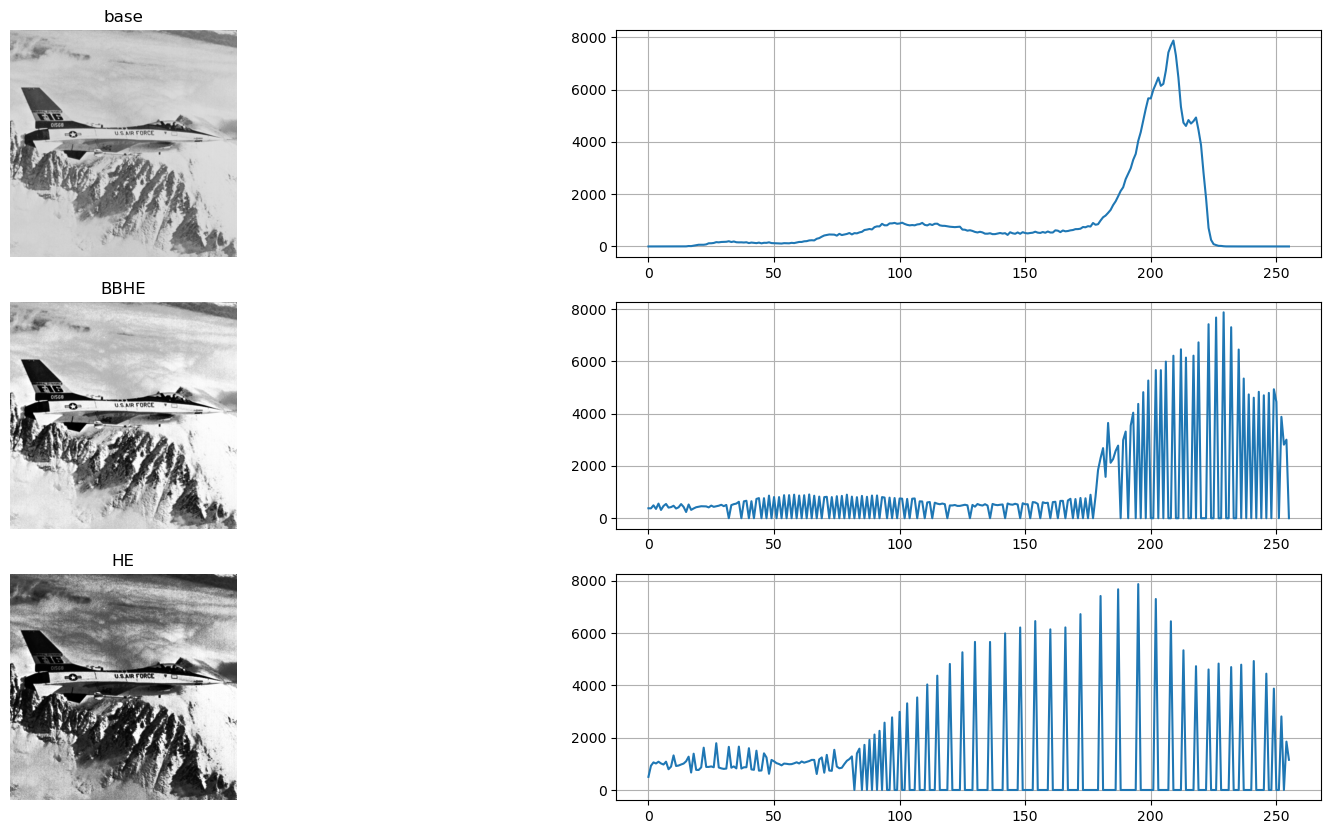

In [14]:
figHist, axsHist = plt.subplots(3, 2)
figHist.set_size_inches(20, 10)
axsHist[0, 0].imshow(I, 'gray', vmin=0, vmax=256)
axsHist[0, 0].axis('off')
axsHist[0, 0].set_title('base')
axsHist[0, 1].plot(H)
axsHist[0, 1].grid()
axsHist[1, 0].imshow(R, 'gray', vmin=0, vmax=256)
axsHist[1, 0].axis('off')
axsHist[1, 0].set_title('BBHE')
axsHist[1, 1].plot(HR)
axsHist[1, 1].grid()
axsHist[2, 0].imshow(E, 'gray', vmin=0, vmax=256)
axsHist[2, 0].axis('off')
axsHist[2, 0].set_title('HE')
axsHist[2, 1].plot(HE)
axsHist[2, 1].grid()